#I. Perkenalan

Nama : Nurul Izzah

Batch : 018

Objective : Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit dan menaikan insight perusahaan kepada pelanggan kartu kredit



#II. Query SQL

SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0

#III. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install feature-engine

from scipy.stats import normaltest
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from statsmodels.stats.outliers_influence import variance_inflation_factor


import pickle
import json
import warnings
warnings.filterwarnings(action='ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 9.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IV. Data Loading

In [3]:
#mengambil data dari gdrive
df = pd.read_csv('/content/drive/MyDrive/dataset/h8dsft_P1G4_Nurul_Izzah.csv')

In [4]:
#menduplikat data agar tidak kehilangan data asli
df_copy = df.copy()

In [5]:
#show data
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


data terdiri dari 4475 baris dan 18 kolom

In [6]:
#melihat 10 data pertama
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [7]:
#melihat 10 data terakhir
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [8]:
#melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

- Dataset ini terdiri dari 4475 entri dan 18 kolom
- Sebagian besar kolom merupakan tipe data float64, sementara beberapa lainnya merupakan tipe data int64

In [9]:
#melihat dseskipsi analisis sederhana
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


- Rata-rata dari saldo adalah 1565,74, dengan saldo minimum 0 dan saldo maksimum 19043,14.

- Jumlah rata-rata dari pembelian adalah 1003,16, dengan pembelian minimum 0 dan pembelian maksimum 49039,57.

- Rata-rata jumlah tarik tunai adalah 973,45, dengan jumlah tarik tunai minimum 0 dan jumlah tarik tunai maksimum 29282,11.

- Rata-rata pelanggan lebih sering melakukan pembelian (0,49) dibandingkan dengan pembelian sekali bayar (0,20) atau pembelian dengan cicilan (0,36).

- Jumlah rata-rata dari batas kredit adalah 4494.02, dengan batas kredit minimum 150 dan batas kredit maksimum 30000.

- Jumlah pembayaran rata-rata adalah 1726.21, dengan pembayaran minimum 0 dan pembayaran maksimum 46930.60.

- Hanya 15,72% nasabah yang membayar tagihan kartu kredit mereka secara penuh.

- Rata-rata tenor (lamanya nasabah memiliki kartu kredit) adalah 11,52 bulan.

#V. Exploratory Data Analysis (EDA)

> Melihat total pembelian yang dilakukan oleh pelanggan

In [10]:
#melihat DA dari kolom 'PURCHASES'
df['PURCHASES'].describe()

count     4475.000000
mean      1003.158324
std       2210.812899
min          0.000000
25%         40.065000
50%        362.480000
75%       1122.640000
max      49039.570000
Name: PURCHASES, dtype: float64

Kolom "PURCHASES" memiliki nilai nilai rata2 1003.16 dengan standar deviasi 2210.81, yang menunjukkan variasi yang cukup besar dalam jumlah pembelian pelanggan. Minimum nilai pembelian adalah 0, yang menunjukkan bahwa ada pelanggan yang tidak melakukan pembelian sama sekali. Sedangkan nilai maksimum pembelian 49039.57, yang menunjukkan bahwa ada pelanggan yang melakukan pembelian dalam jumlah yang sangat besar.

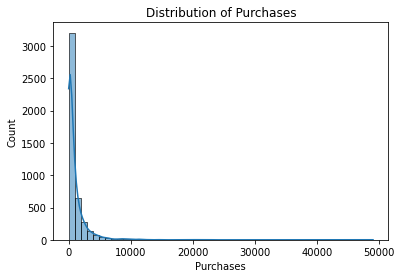

In [11]:
#distribusi data dari kolom 'PURCHASES'
sns.histplot(df['PURCHASES'], bins=50, kde=True)
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.show()

kesimpulan dari visualisasi tersebut adalah terlihat bahwa jumlah data yang semakin berkurang seiring dengan meningkatnya nilai pembelian. Ini menunjukkan bahwa lebih banyak pelanggan melakukan pembelian dengan nilai rendah atau sedang, dibandingkan dengan pembelian dengan nilai yang sangat tinggi

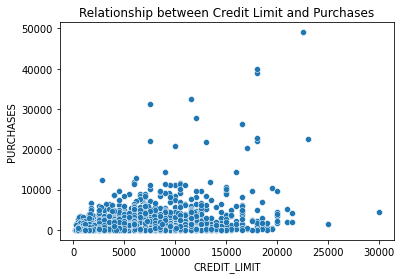

In [12]:
# Visualize the relationship between 'PURCHASES' and 'CREDIT_LIMIT'
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES')
plt.title('Relationship between Credit Limit and Purchases')
plt.show()

mayoritas pelanggan memiliki batas kredit dan jumlah pembelian yang relatif rendah (dalam kisaran 0-20000). Namun, terdapat sejumlah besar data yang terletak di luar kisaran tersebut (outliers), yang menunjukkan adanya sejumlah pelanggan yang melakukan pembelian dalam jumlah yang jauh lebih besar atau memiliki batas kredit yang lebih tinggi.

> Melihat batas kredit yang diberikan kepada pelanggan

In [13]:
df['CREDIT_LIMIT'].describe()

count     4474.000000
mean      4494.020175
std       3668.535689
min        150.000000
25%       1500.000000
50%       3000.000000
75%       6000.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

mayoritas pelanggan memiliki batas kredit yang relatif rendah (dalam kisaran 150-6000), dengan nilai rata-rata sebesar 4494.02. Namun, terdapat pula sejumlah pelanggan yang memiliki batas kredit yang lebih tinggi, bahkan mencapai nilai tertinggi 30000

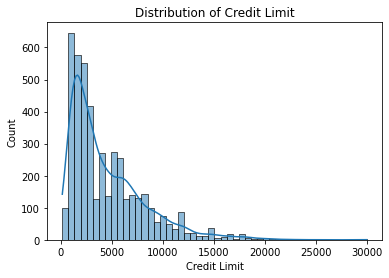

In [14]:
# Visualize the distribution of 'CREDIT_LIMIT'
sns.histplot(df['CREDIT_LIMIT'], bins=50, kde=True)
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Count')
plt.show()

dari visualisasinya menunjukkan bahwa sebagian besar pelanggan memiliki batas kredit yang relatif kecil, sementara hanya sedikit pelanggan yang memiliki batas kredit yang lebih besar.

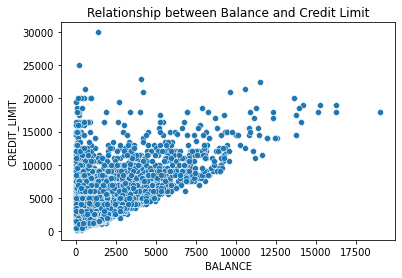

In [15]:
# Visualize the relationship between 'CREDIT_LIMIT' and 'BALANCE'
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT')
plt.title('Relationship between Balance and Credit Limit')
plt.show()

Dari visualisasi ini, dapat dilihat hubungan antara nilai saldo akun dan batas kredit pelanggan. Garis diagonal pada plot menunjukkan bahwa terdapat korelasi positif antara keduanya, artinya semakin tinggi nilai batas kredit, semakin tinggi pula nilai saldo akun pelanggan. Namun, terdapat juga sejumlah titik yang berada di bawah garis diagonal, yang menunjukkan adanya pelanggan dengan nilai batas kredit yang tinggi namun memiliki saldo akun yang rendah

> Melihat total pembayaran yang dilakukan oleh pelanggan

In [16]:
df['PAYMENTS'].describe()

count     4475.000000
mean      1726.212274
std       2961.258570
min          0.000000
25%        390.206371
50%        831.048408
75%       1895.959003
max      46930.598240
Name: PAYMENTS, dtype: float64

Rata-rata jumlah pembayaran adalah sebesar 1726.212274, dengan standar deviasi sebesar 2961.258570. Nilai minimum yang tercatat adalah 0, sedangkan nilai maksimum yang tercatat adalah sebesar 46930.598240. Dari persentil data, diketahui bahwa 75% dari pelanggan memiliki total pembayaran kurang dari atau sama dengan 1895.959003. Hal ini menunjukkan adanya variasi yang cukup besar dalam jumlah pembayaran pelanggan.

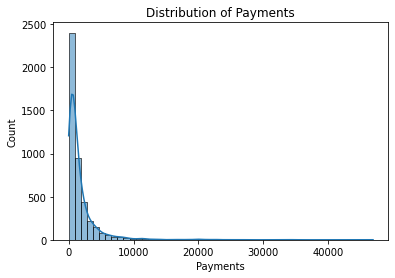

In [17]:
# Visualize the distribution of 'PAYMENTS'
sns.histplot(df['PAYMENTS'], bins=50, kde=True)
plt.title('Distribution of Payments')
plt.xlabel('Payments')
plt.ylabel('Count')
plt.show()

dari visualisasi tersebut menunjukkan bahwa sebagian besar pelanggan melakukan pembayaran dengan jumlah yang relatif kecil dan hanya sedikit pelanggan yang melakukan pembayaran dengan jumlah yang lebih besar

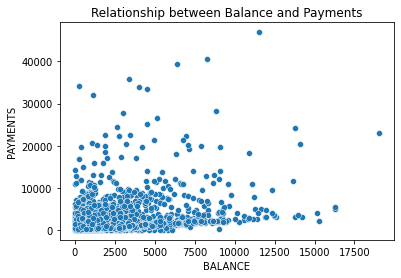

In [18]:
# Visualize the relationship between 'PAYMENTS' and 'BALANCE'
sns.scatterplot(data=df, x='BALANCE', y='PAYMENTS')
plt.title('Relationship between Balance and Payments')
plt.show()

Garis diagonal pada visualisasi tersebut menunjukkan pengguna kartu kredit yang membayar saldo mereka setiap bulannya secara konsisten, sedangkan sebaran titik-titik data yang tersebar merata menunjukkan bahwa pengguna kartu kredit memiliki pola pembayaran yang tidak konsisten

> Melihat pembayaran minimum yang dilakukan oleh pelanggan

In [19]:
df['MINIMUM_PAYMENTS'].describe()

count     4317.000000
mean       854.429538
std       2306.411178
min          0.037744
25%        169.814310
50%        309.854995
75%        830.395060
max      61031.618600
Name: MINIMUM_PAYMENTS, dtype: float64

disimpulkan bahwa terdapat beberapa pengguna kartu kredit yang membayar nilai minimum payments dengan jumlah yang sangat besar. Namun, mayoritas pengguna kartu kredit membayar nilai minimum payments pada rentang yang cukup wajar.

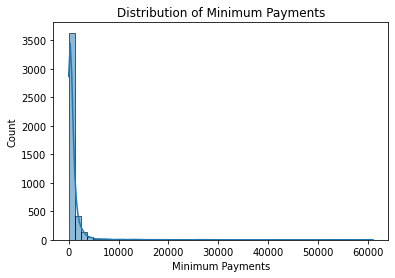

In [20]:
# Visualize the distribution of 'MINIMUM_PAYMENTS'
sns.histplot(df['MINIMUM_PAYMENTS'], bins=50, kde=True)
plt.title('Distribution of Minimum Payments')
plt.xlabel('Minimum Payments')
plt.ylabel('Count')
plt.show()

dari visualisasi tersebut menunjukkan bahwa sebagian besar nilai minimum pembayaran relatif kecil, namun ada beberapa nilai yang sangat besar.

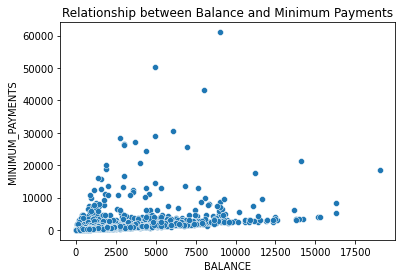

In [21]:
# Visualize the relationship between 'MINIMUM_PAYMENTS' and 'BALANCE'
sns.scatterplot(data=df, x='BALANCE', y='MINIMUM_PAYMENTS')
plt.title('Relationship between Balance and Minimum Payments')
plt.show()

dari visualisasi tersebut menunjukkan bahwa tidak ada korelasi yang kuat antara saldo pengguna kartu kredit dan pembayaran minimum yang harus dibayarkan setiap bulannya

> Melihat jangka waktu penggunaan kartu kredit oleh pelanggan

In [22]:
df['TENURE'].describe()

count    4475.000000
mean       11.516425
std         1.347819
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

- Data tenure memiliki 4475 jumlah data dengan rentang nilai tenure antara 6 hingga 12 bulan

- Rata-rata tenure adalah sekitar 11,5 bulan dengan standar deviasi sebesar 1,35 bulan, yang menunjukkan tingkat variasi yang relatif rendah

- Nilai median tenure sama dengan nilai kuartil ke-2, yaitu 12 bulan. Hal ini menunjukkan bahwa sebagian besar pengguna kartu kredit dalam  memegang kartu kredit selama 12 bulan

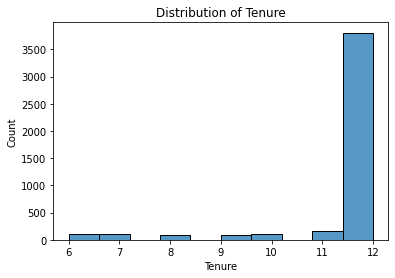

In [23]:
# Visualize the distribution of 'TENURE'
sns.histplot(df['TENURE'], bins=10, kde=False)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

dari visualisasi tersebut, terlihat bahwa sebagian besar pengguna memiliki tenure selama 12 bulan, sedangkan pengguna dengan tenure kurang dari 12 bulan jauh lebih sedikit.

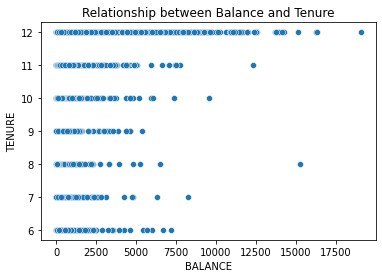

In [24]:
# Visualize the relationship between 'TENURE' and 'BALANCE'
sns.scatterplot(data=df, x='BALANCE', y='TENURE')
plt.title('Relationship between Balance and Tenure')
plt.show()

dari visualisasi tersebut menunjukkan bahwa mayoritas pengguna kartu kredit memiliki masa tenor selama 12 bulan, namun setiap masa tenor memiliki nilai outlier yang cukup signifikan, yang menunjukkan variasi yang cukup besar dalam saldo pengguna. Oleh karena itu, tidak ada korelasi yang jelas antara masa tenor dan saldo pengguna kartu kredit.

##Data Cleaning

dalam permodelan machine learning, kolom ID tidak diperlukan untuk dimasukan ke dalam permodelan, karena, tidak memberi informasi apapun, jadi sebaiknya di hapus

In [25]:
#menghapus kolom cust_id
df.drop('CUST_ID', axis=1, inplace=True)

#VI. Feature Engineering

##Handling Outlier

In [26]:
# Define function to detect outlier
def detect_outlier(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Loop through each column in the dataframe
for col in df.columns:
    outliers = detect_outlier(df[col])
    total = len(df[col])
    percentage = round((len(outliers) / total) * 100, 2)

    # Check normality
    normal, p = normaltest(df[col])
    if p < 0.06:
        dist = 'Skewed'
    else:
        dist = 'Normal'

    print('Column:', col)
    print('Percentage of Outliers:', percentage, '%')
    print('Distribution:', dist, '\n')


Column: BALANCE
Percentage of Outliers: 2.28 %
Distribution: Skewed 

Column: BALANCE_FREQUENCY
Percentage of Outliers: 1.94 %
Distribution: Skewed 

Column: PURCHASES
Percentage of Outliers: 1.41 %
Distribution: Skewed 

Column: ONEOFF_PURCHASES
Percentage of Outliers: 1.34 %
Distribution: Skewed 

Column: INSTALLMENTS_PURCHASES
Percentage of Outliers: 1.34 %
Distribution: Skewed 

Column: CASH_ADVANCE
Percentage of Outliers: 2.08 %
Distribution: Skewed 

Column: PURCHASES_FREQUENCY
Percentage of Outliers: 0.0 %
Distribution: Skewed 

Column: ONEOFF_PURCHASES_FREQUENCY
Percentage of Outliers: 0.0 %
Distribution: Skewed 

Column: PURCHASES_INSTALLMENTS_FREQUENCY
Percentage of Outliers: 0.0 %
Distribution: Skewed 

Column: CASH_ADVANCE_FREQUENCY
Percentage of Outliers: 2.28 %
Distribution: Skewed 

Column: CASH_ADVANCE_TRX
Percentage of Outliers: 2.19 %
Distribution: Skewed 

Column: PURCHASES_TRX
Percentage of Outliers: 2.19 %
Distribution: Skewed 

Column: CREDIT_LIMIT
Percentage of O

setelah di deteksi outlier, ada beberapa yg sudah terhandle dan ada juga yg masih terdapat outlier

kolom yg memiliki distribusi skew dan belum terhandling : 
- BALANCE
- BALANCE_FREQUENCY
- PURCHASES
- ONEOFF_PURCHASES
- INSTALLMENTS_PURCHASES
- CASH_ADVANCE
- CASH_ADVANCE_FREQUENCY
- CASH_ADVANCE_TRX
- PURCHASES_TRX
- PAYMENTS

kolom yg memiliki distribusi normal dan belum terhandling :
- CREDIT_LIMIT
- MINIMUM_PAYMENTS

###Handling Outlier using Gaussian method for Normal Distribution

In [27]:
#menghandle outlier untuk data yg distribusi normal
def count_outliers_gaussian(df, col_name):
    col_mean, col_std = df[col_name].mean(), df[col_name].std()
  
    cut_off = col_std * 7
    lower, upper = col_mean - cut_off, col_mean + cut_off
    num_outliers = len(df[(df[col_name] < lower) | (df[col_name] > upper)])
    percentage_outliers = (num_outliers / len(df)) * 100
    
    return percentage_outliers

In [28]:
#melihat presentase outlier yg sudah di handle
outlier_percentage = count_outliers_gaussian(df, 'CREDIT_LIMIT')
print(f'Presentase outlier pada kolom CREDIT_LIMIT adalah {outlier_percentage:.2f}%')

Presentase outlier pada kolom CREDIT_LIMIT adalah 0.00%


In [29]:
#melihat presentase outlier yg sudah di handle
#outlier_percentage = count_outliers_gaussian(df, 'MINIMUM_PAYMENTS')
#print(f'Presentase outlier pada kolom MINIMUM_PAYMENTS adalah {outlier_percentage:.2f}%')

masih terdapat outlier dikolom MINIMUM_PAYMENTS

In [30]:
#menggunakan capping untuk kolom 'MINIMUM_PAYMENTS'
mean = df['MINIMUM_PAYMENTS'].mean()
std = df['MINIMUM_PAYMENTS'].std()


upper_boundary = mean + 3*std
lower_boundary = mean - 3*std


df['MINIMUM_PAYMENTS'] = np.where(df['MINIMUM_PAYMENTS'] > upper_boundary, upper_boundary, df['MINIMUM_PAYMENTS'])
outlier_percentage = (len(df[df['MINIMUM_PAYMENTS'] < lower_boundary]) + len(df[df['MINIMUM_PAYMENTS'] > upper_boundary])) / len(df) * 100
print('Percentage of outliers after capping: ', outlier_percentage, '%')

Percentage of outliers after capping:  0.0 %


####Handling Outlier for skewed variables using winsorizing

In [31]:
#groupping data
outlier = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
              'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS']]
outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS
0,16.581535,0.125,200.0,0.0,200.0,0.0,0.0,0,2,0.000000
1,943.584041,0.875,103.0,103.0,0.0,0.0,0.0,0,1,215.325023
2,1.979916,0.125,80.0,80.0,0.0,0.0,0.0,0,1,0.000000
3,461.455720,1.000,585.0,585.0,0.0,0.0,0.0,0,1,258.032630
4,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.0,0,1,397.090516


In [32]:
#menggunakan winsorizer
for col in outlier:
    winsoriserdf = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 
                                                                                      'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                                                                      'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 
                                                                                      'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS'])

winsoriserdf.fit(outlier)
outlierdf = winsoriserdf.transform(outlier)

In [33]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', winsoriserdf.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', winsoriserdf.right_tail_caps_)

Left Tail Caps  :  {'BALANCE': -2756.437862, 'BALANCE_FREQUENCY': 0.7222225000000001, 'PURCHASES': -1583.7974999999997, 'ONEOFF_PURCHASES': -870.48, 'INSTALLMENTS_PURCHASES': -726.3824999999999, 'CASH_ADVANCE': -1647.854943, 'CASH_ADVANCE_FREQUENCY': -0.272727, 'CASH_ADVANCE_TRX': -6.0, 'PURCHASES_TRX': -23.0, 'PAYMENTS': -1868.422577}
Right Tail Caps :  {'BALANCE': 4947.493378, 'BALANCE_FREQUENCY': 1.1666664999999998, 'PURCHASES': 2746.5024999999996, 'ONEOFF_PURCHASES': 1450.8000000000002, 'INSTALLMENTS_PURCHASES': 1210.6374999999998, 'CASH_ADVANCE': 2746.424905, 'CASH_ADVANCE_FREQUENCY': 0.454545, 'CASH_ADVANCE_TRX': 10.0, 'PURCHASES_TRX': 41.0, 'PAYMENTS': 4154.5879509999995}


In [34]:
#transofmasi kolom X_train
df_new = winsoriserdf.fit_transform(df)

##Handling Missing Value

In [35]:
df_new.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

terdapat missing value di kolom minimum_payments(158) dan credit_limit(1), maka akan menggunakan chi-square untuk menguji apakah missing data pada df termasuk MCAR atau tidak

In [36]:
# membuat variabel dummy untuk missing value
missing_dummy = pd.isnull(df_new[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']]).astype(int)

In [37]:
# membuat tabel kontingensi
contingency_table = pd.crosstab(missing_dummy['CREDIT_LIMIT'], missing_dummy['MINIMUM_PAYMENTS'])
contingency_table

MINIMUM_PAYMENTS,0,1
CREDIT_LIMIT,,
0,4316,158
1,1,0


In [38]:
# melakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)
# menampilkan hasil uji chi-square
print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 0.0
p-value: 1.0


hasil uji chi-square menunjukkan bahwa p-value = 1.0, artinya tidak terdapat hubungan yang signifikan antara missing value pada kolom CREDIT_LIMIT dengan missing value pada kolom MINIMUM_PAYMENTS. Hal ini menunjukkan bahwa missing value pada kedua kolom tersebut dapat dianggap sebagai Missing Completely At Random (MCAR).

In [39]:
# imputasi nilai median pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS
credit_limit_median = df_new['CREDIT_LIMIT'].median()
df_new['CREDIT_LIMIT'] = df_new['CREDIT_LIMIT'].fillna(credit_limit_median)
minimum_payments_median = df_new['MINIMUM_PAYMENTS'].median()
df_new['MINIMUM_PAYMENTS'] = df_new['MINIMUM_PAYMENTS'].fillna(minimum_payments_median)

##Feature Scaling

menggunakan min-max scaler karena dari awal datanya skew

In [40]:
#scaling data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_new)

In [41]:
# menghitung VIF setiap fitur pada data
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,5.983915,BALANCE
1,6.679406,BALANCE_FREQUENCY
2,27.506526,PURCHASES
3,15.090554,ONEOFF_PURCHASES
4,11.476211,INSTALLMENTS_PURCHASES
5,5.067529,CASH_ADVANCE
6,25.052041,PURCHASES_FREQUENCY
7,8.743877,ONEOFF_PURCHASES_FREQUENCY
8,21.905710,PURCHASES_INSTALLMENTS_FREQUENCY
9,12.071694,CASH_ADVANCE_FREQUENCY


Dari tabel VIF tersebut, ada beberapa fitur yang memiliki nilai VIF yang cukup tinggi, yaitu PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, dan PURCHASES_INSTALLMENTS_FREQUENCY dengan nilai VIF masing-masing di atas 10

In [42]:
# PCA
pca = PCA().fit(df_scaled)

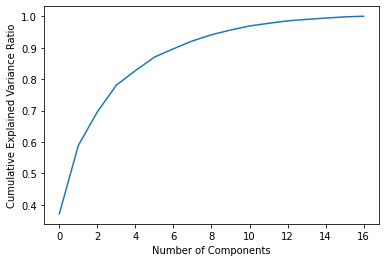

In [43]:
# Plot cumulative explained variance ratio (EVR)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

terdapat 4 titik siku elbow didalam visualisasi tersebut, yaitu dititik 3, titik 5, dan 10

##Using PCA for reduce dimention

In [44]:
# buat objek PCA
pca = PCA(n_components=3)

In [45]:
# fit dan transform data
pca_result = pca.fit_transform(df_scaled)
print("Jumlah kolom hasil reduksi PCA:", pca_result.shape[1])

Jumlah kolom hasil reduksi PCA: 3


#VII. Model Definition

- Menggunakan PCA untuk mereduksi dimensi datanya
- algoritma yg digunakan adalah K-Means Clustering karena cepat dan efisien untuk digunakan terutama untuk data yg banyak

#VIII. Model Training

mengecek elbow method dan silhoutte score untuk mengecek berapa cluster yg harus di gunakan

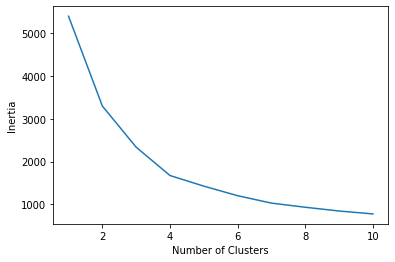

In [46]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=33)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

dari visualisasi elbow method dapat dilihat sisi sikunya berada di 2,4, dan 7

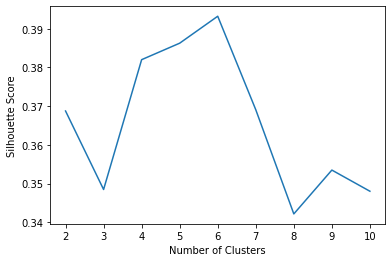

In [47]:
# Silhouette score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=33)
    kmeans.fit(pca_result)
    sil_score = silhouette_score(pca_result, kmeans.labels_)
    sil_scores.append(sil_score)
plt.plot(range(2, 11), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

setelah mengecek visualisasi nilai Silhouette Score, Nilai silhouette score tertinggi terdapat pada jumlah cluster 7 dengan nilai 0.33. Hal ini menunjukkan bahwa jumlah cluster yang optimal untuk data tersebut adalah 7

In [48]:
# Melakukan KMeans clustering dengan 6 cluster
kmeans = KMeans(n_clusters=6, random_state=15)
kmeans.fit(pca_result)

KMeans(n_clusters=6, random_state=15)

In [49]:
# Menambahkan hasil clustering ke dalam dataframe
df['cluster'] = kmeans.labels_

#IX. Model Evaluation

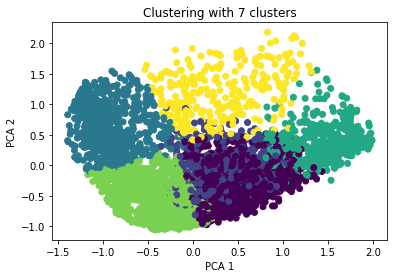

In [50]:
# Membuat scatterplot
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['cluster'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering with 7 clusters')

plt.show()

terlihat adadata yg saling bertumpukan, maka akan menecek nilai silhouette scorenya

In [51]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(pca_result, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.393606147927086


dari nilai silhouette score yg di peroleh, tergolong baik, tapi tidak optimal

menggunakan komponen pca 3, cluster 4
Silhouette Score: 0.38210490424408894

menggunakan komponen pca 3, cluster 2
Silhouette Score: 0.36876516061343523

menggunakan komponen pca 3, cluster 6
Silhouette Score: 0.39360614878292455

menggunakan komponen pca 5, cluster 7
Silhouette Score: 0.3312603762334041

menggunakan komponen pca 5, cluster 5
Silhouette Score: 0.31645499239186453

menggunakan komponen pca 5, cluster 4
Silhouette Score: 0.30007271969705845

menggunakan komponen pca 5, cluster 3
Silhouette Score: 0.28349334467840875

menggunakan komponen pca 5, cluster 2
Silhouette Score: 0.3096397115427658

menggunakan komponen pca 10, cluster 8
Silhouette Score: 0.2542446925249016

menggunakan komponen pca 10, cluster 2
Silhouette Score: 0.2685808615793832

menggunakan komponen pca 10, cluster 3
Silhouette Score: 0.2368972310253215

menggunakan komponen pca 10, cluster 4
Silhouette Score: 0.2437922267970933

menggunakan komponen pca 10, cluster 5
Silhouette Score: 0.2508257161141971

menggunakan komponen pca 10, cluster 7
Silhouette Score: 0.2591107107764209

setelah membandingkan beberapa komponen dan cluster, maka yg akan digunakan adalah komponen PCA 3, cluster 6

##Using PCA with n_components=2

In [52]:
# Menggunakan PCA dengan 2 komponen
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(pca_result)

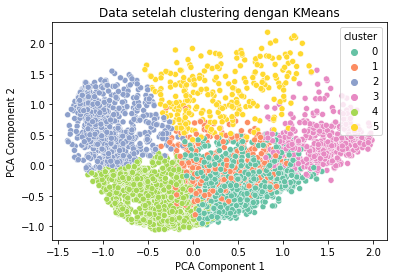

In [53]:
# Visualisasi cluster pada 2 dimensi
sns.scatterplot(x=pca_result_2[:, 0], y=pca_result_2[:, 1], hue=df['cluster'], palette='Set2')
plt.title('Data setelah clustering dengan KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

dari visualisasi mengunakan 5 komponen ataupun 2 komponen tidak terlihat perbedaanya

In [54]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(pca_result_2, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3158495200579976


dari nilai silhouette score yg di peroleh, tergolong baik, tapi tidak optimal

##EDA final cluster

In [55]:
# Menampilkan hasil clustering
print(df.groupby('cluster').mean())

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0         675.497432           0.925316   751.095420         88.625512   
1        1137.202533           0.886251  1490.486165       1312.240843   
2        3034.526863           0.956105   108.808235         83.725638   
3        2021.211756           0.986970  4453.182965       2840.865706   
4         697.354954           0.721820   167.930506        102.065389   
5        4098.853576           0.989697  1845.053091       1064.484036   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    663.605248     94.344995             0.882989   
1                    178.532329    170.298059             0.606667   
2                     25.156903   2966.384902             0.096920   
3                   1612.317260    111.270032            

beberapa kesimpulan dan saran untuk setiap clusternya :

1. Cluster 0: Pelanggan dalam cluster ini sering melakukan pembelian secara angsuran. Untuk meningkatkan aktivitas pembelian, perusahaan bisa memberikan reward berupa potongan bunga atau keringanan biaya bunga untuk pembelian secara angsuran.

2. Cluster 1: Pelanggan dalam cluster ini memiliki pembelian yang tinggi dalam pembelian satu kali (oneoff). Perusahaan bisa memberikan reward berupa diskon atau kupon belanja untuk pembelian satu kali agar dapat mendorong pelanggan untuk melakukan lebih banyak pembelian.

3. Cluster 2: Pelanggan dalam cluster ini sering melakukan penarikan tunai. Perusahaan bisa memberikan reward berupa keringanan biaya atau potongan bunga untuk transaksi pembelian agar dapat mendorong pelanggan untuk lebih sering melakukan pembelian dengan kartu kredit daripada melakukan penarikan tunai.

4. Cluster 3: Pelanggan dalam cluster ini memiliki pembelian dan limit kredit yang tinggi. Untuk mempertahankan kepercayaan pelanggan, perusahaan bisa memberikan reward berupa perlindungan asuransi atau keringanan biaya kartu kredit.

5. Cluster 4: Pelanggan dalam cluster ini sering melakukan penarikan tunai dan pembelian dengan frekuensi rendah. Perusahaan bisa memberikan reward berupa keringanan biaya atau diskon belanja untuk pembelian dengan frekuensi tertentu agar dapat mendorong pelanggan untuk lebih sering menggunakan kartu kredit.

6. Cluster 5: Pelanggan dalam cluster ini memiliki saldo, pembelian, dan limit kredit yang sangat tinggi, namun jarang melakukan pembayaran penuh dan pembelian secara angsuran. Perusahaan bisa memberikan reward berupa poin reward atau kupon belanja untuk pembayaran penuh atau pembelian secara angsuran untuk mendorong pelanggan agar lebih aktif menggunakan kartu kredit secara optimal.

##Model Saving

In [56]:
# Save the Files

with open('model_kmeans.pkl', 'wb') as file_1:
  pickle.dump(kmeans, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)